In [12]:
import numpy as np
import pandas as pd
from sklearn import datasets


data = pd.read_csv("/Users/gustavosganzerla/Documents/covid/mpo/long/all_patients.csv")

X = data.iloc[:, 1:91].values
y = data.iloc[:, 93].values


In [13]:
y

array([ 0,  0, 10,  0,  5,  0, 13,  0,  0,  9, 15,  4,  7, 14,  6,  0, 13,
       13,  6,  9, 11, 11,  7,  3, 16, 11,  7,  3, 14, 15,  9, 11,  3, 12,
       13,  1,  8, 10,  0, 10,  9,  4, 13, 11,  0, 12, 14,  3,  8,  9,  8,
       15,  0,  0, 12, 18, 14,  2, 10, 13, 15,  7, 12, 11, 11,  0,  7,  8,
       10,  2,  7,  4,  7, 11,  8, 11, 16,  9, 11, 12,  4,  6,  5,  9,  5,
        4,  2, 10,  2,  4, 11,  7, 13, 11,  5, 12, 11, 12,  3, 12, 19,  2,
        8,  6,  8, 10,  8,  4,  8, 12, 10,  9,  4,  8,  5,  3,  4,  9,  8,
        9,  2,  9,  6,  8,  2,  4,  5,  5])

/Users/gustavosganzerla/opt/anaconda3/envs/p3workshop/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in long_scalars
/Users/gustavosganzerla/opt/anaconda3/envs/p3workshop/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in long_scalars
/Users/gustavosganzerla/opt/anaconda3/envs/p3workshop/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in long_scalars
/Users/gustavosganzerla/opt/anaconda3/envs/p3workshop/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in long_scalars
/Users/gustavosganzerla/opt/anaconda3/envs/p3workshop/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in long_scalars
/Users/gustavosganzerla/opt/anaconda3/envs/p3workshop/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in long_scalars
/Use

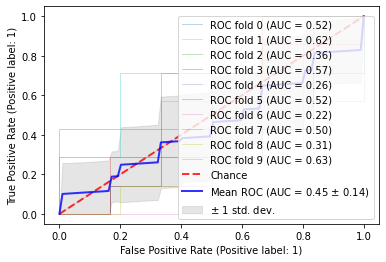

In [10]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn import svm
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve

# Run classifier with cross-validation and plot ROC curves
random_state = np.random.RandomState(0)
cv = StratifiedKFold(n_splits=10)
classifier = svm.SVC(kernel="poly", probability=True, random_state=random_state)

tprs = []
aucs = []
accuracy_list = []
precision_list = []
recall_list = []
pred_lists = []
specificity_list = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    ##classification metrics
    y_pred = classifier.predict(X[test])
    accuracy_list.append(metrics.accuracy_score(y_pred, y[test]))
    precision_list.append(metrics.precision_score(y_pred, y[test]))
    recall_list.append(metrics.recall_score(y_pred, y[test]))
    tn, fp, fn, tp = confusion_matrix(y_pred, y[test]).ravel()
    specificity_list.append(tn/(tn+fp))
    
    ###roc visualization
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="",
)
ax.legend(loc="lower right")
plt.show()